In [1]:
import tensorflow as tf
import pandas as pd

tf.compat.v1.disable_v2_behavior()

import codecs
import numpy as np
import math
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow.keras.preprocessing
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Add, Multiply
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation, BatchNormalization
# regularizers
from tensorflow.keras.layers import Conv1D, Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout
from scipy import signal
import openpyxl

data_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2011_smd_hourly.xls'
data_source_2011 = pd.read_excel(data_path_2011, sheet_name='ISONE CA')
data_source_2011 = pd.DataFrame(data_source_2011)
data_set_2011 = data_source_2011.iloc[:, -4:-1]
data_set_2011 = np.array(data_set_2011)

data_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2012_smd_hourly.xls'
data_source_2012 = pd.read_excel(data_path_2012, sheet_name='ISONE CA')
data_source_2012 = pd.DataFrame(data_source_2012)
data_set_2012a = np.array(data_source_2012.iloc[:1416, -4:-1])
data_set_2012b = np.array(data_source_2012.iloc[1440:, -4:-1])
data_set_2012 = np.vstack([data_set_2012a, data_set_2012b])
data_set_2012 = np.array(data_set_2012)

data_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2013_smd_hourly.xls'
data_source_2013 = pd.read_excel(data_path_2013, sheet_name='ISONE CA')
data_source_2013 = pd.DataFrame(data_source_2013)
data_set_2013 = data_source_2013.iloc[:, -4:-1]
data_set_2013 = np.array(data_set_2013)

data_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2014_smd_hourly.xls'
data_source_2014 = pd.read_excel(data_path_2014, sheet_name='ISONE CA')
data_source_2014 = pd.DataFrame(data_source_2014)
data_set_2014 = data_source_2014.iloc[:, -4:-1]
data_set_2014 = np.array(data_set_2014)

data_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2015_smd_hourly.xls'
data_source_2015 = pd.read_excel(data_path_2015, sheet_name='ISONE CA')
data_source_2015 = pd.DataFrame(data_source_2015)
data_set_2015 = data_source_2015.iloc[:, -4:-1]
data_set_2015 = np.array(data_set_2015)

data_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2016_smd_hourly.xls'
data_source_2016 = pd.read_excel(data_path_2016, sheet_name='ISO NE CA')
data_source_2016 = pd.DataFrame(data_source_2016)
data_set_2016a = np.array(data_source_2016.iloc[:1416, -5:-2])
data_set_2016b = np.array(data_source_2016.iloc[1440:, -5:-2])
data_set_2016 = np.vstack([data_set_2016a, data_set_2016b])
data_set_2016 = np.array(data_set_2016)

data_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2017_smd_hourly.xlsx'
data_source_2017 = pd.read_excel(data_path_2017, sheet_name='ISO NE CA')
data_source_2017 = pd.DataFrame(data_source_2017)
data_set_2017 = data_source_2017.iloc[:, -9:-6]
data_set_2017 = np.array(data_set_2017)

data_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2018_smd_hourly.xlsx'
data_source_2018 = pd.read_excel(data_path_2018, sheet_name='ISO NE CA')
data_source_2018 = pd.DataFrame(data_source_2018)
data_set_2018 = data_source_2018.iloc[:, -9:-6]
data_set_2018 = np.array(data_set_2018)

data_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2019_smd_hourly.xlsx'
data_source_2019 = pd.read_excel(data_path_2019, sheet_name='ISO NE CA')
data_source_2019 = pd.DataFrame(data_source_2019)
data_set_2019 = data_source_2019.iloc[:, -9:-6]
data_set_2019 = np.array(data_set_2019)

load = np.vstack([data_set_2011, data_set_2012, data_set_2013, data_set_2014, data_set_2015, data_set_2016, data_set_2017, data_set_2018, data_set_2019])
print(data_set_2011.shape)
print(data_set_2012.shape)
print(data_set_2013.shape)
print(data_set_2014.shape)
print(data_set_2015.shape)
print(data_set_2016.shape)
print(data_set_2017.shape)
print(data_set_2018.shape)
print(data_set_2019.shape)
print(load.shape)

pv_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2011.xlsx'
pv_source_2011 = pd.read_excel(pv_path_2011, sheet_name='HourlyData')
pv_source_2011 = pd.DataFrame(pv_source_2011)
pv_set_2011 = pv_source_2011.iloc[:, 3]
pv_set_2011 = pv_set_2011.fillna(0)
pv_set_2011 = np.array(pv_set_2011)
pv_set_2011 = pv_set_2011.reshape(-1,1)

pv_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2012.xlsx'
pv_source_2012 = pd.read_excel(pv_path_2012, sheet_name='HourlyData')
pv_source_2012 = pd.DataFrame(pv_source_2012)
pv_source_2012 = pv_source_2012.fillna(0)
pv_set_2012a = np.array(pv_source_2012.iloc[:1416, 3])
pv_set_2012b = np.array(pv_source_2012.iloc[1440:, 3])
pv_set_2012 = np.concatenate((pv_set_2012a, pv_set_2012b), axis=None)
pv_set_2012 = np.array(pv_set_2012)
pv_set_2012 = pv_set_2012.reshape(-1,1)

pv_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2013.xlsx'
pv_source_2013 = pd.read_excel(pv_path_2013, sheet_name='HourlyData')
pv_source_2013 = pd.DataFrame(pv_source_2013)
pv_set_2013 = pv_source_2013.iloc[:, 3]
pv_set_2013 = pv_set_2013.fillna(0)
pv_set_2013 = np.array(pv_set_2013)
pv_set_2013 = pv_set_2013.reshape(-1,1)

pv_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2014.xlsx'
pv_source_2014 = pd.read_excel(pv_path_2014, sheet_name='HourlyData')
pv_source_2014 = pd.DataFrame(pv_source_2014)
pv_set_2014 = pv_source_2014.iloc[:, 3]
pv_set_2014 = pv_set_2014.fillna(0)
pv_set_2014 = np.array(pv_set_2014)
pv_set_2014 = pv_set_2014.reshape(-1,1)

pv_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2015.xlsx'
pv_source_2015 = pd.read_excel(pv_path_2015, sheet_name='HourlyData')
pv_source_2015 = pd.DataFrame(pv_source_2015)
pv_set_2015 = pv_source_2015.iloc[:, 3]
pv_set_2015 = pv_set_2015.fillna(0)
pv_set_2015 = np.array(pv_set_2015)
pv_set_2015 = pv_set_2015.reshape(-1,1)

pv_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2016.xlsx'
pv_source_2016 = pd.read_excel(pv_path_2016, sheet_name='HourlyData')
pv_source_2016 = pd.DataFrame(pv_source_2016)
pv_source_2016 = pv_source_2016.fillna(0)
pv_set_2016a = np.array(pv_source_2016.iloc[:1416, 3])
pv_set_2016b = np.array(pv_source_2016.iloc[1440:, 3])
pv_set_2016 = np.concatenate((pv_set_2016a, pv_set_2016b), axis=None)
pv_set_2016 = np.array(pv_set_2016)
pv_set_2016 = pv_set_2016.reshape(-1,1)

pv_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2017.xlsx'
pv_source_2017 = pd.read_excel(pv_path_2017, sheet_name='HourlyData')
pv_source_2017 = pd.DataFrame(pv_source_2017)
pv_set_2017 = pv_source_2017.iloc[:, 3]
pv_set_2017 = pv_set_2017.fillna(0)
pv_set_2017 = np.array(pv_set_2017)
pv_set_2017 = pv_set_2017.reshape(-1,1)

pv_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2018.xlsx'
pv_source_2018 = pd.read_excel(pv_path_2018, sheet_name='HourlyData')
pv_source_2018 = pd.DataFrame(pv_source_2018)
pv_set_2018 = pv_source_2018.iloc[:, 3]
pv_set_2018 = pv_set_2018.fillna(0)
pv_set_2018 = np.array(pv_set_2018)
pv_set_2018 = pv_set_2018.reshape(-1,1)

pv_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2019.xlsx'
pv_source_2019 = pd.read_excel(pv_path_2019, sheet_name='HourlyData')
pv_source_2019 = pd.DataFrame(pv_source_2019)
pv_set_2019 = pv_source_2019.iloc[:, 3]
pv_set_2019 = pv_set_2019.fillna(0)
pv_set_2019 = np.array(pv_set_2019)
pv_set_2019 = pv_set_2019.reshape(-1,1)

pv = np.concatenate((pv_set_2011, pv_set_2012, pv_set_2013, pv_set_2014, pv_set_2015, pv_set_2016, pv_set_2017, pv_set_2018, pv_set_2019), axis=None)
pv = pv.reshape(-1,1)
print(pv.shape)

weather_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2011.csv'
weather_source_2011 = pd.read_csv(weather_path_2011)
weather_source_2011 = pd.DataFrame(weather_source_2011)
weather_set_2011 = weather_source_2011.iloc[2:, 5:16]
weather_set_2011 = np.array(weather_set_2011, dtype='float')

weather_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2012.csv'
weather_source_2012 = pd.read_csv(weather_path_2012)
weather_source_2012 = pd.DataFrame(weather_source_2012)
weather_set_2012 = weather_source_2012.iloc[2:, 5:16]
weather_set_2012 = np.array(weather_set_2012, dtype='float')

weather_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2013.csv'
weather_source_2013 = pd.read_csv(weather_path_2013)
weather_source_2013 = pd.DataFrame(weather_source_2013)
weather_set_2013 = weather_source_2013.iloc[2:, 5:16]
weather_set_2013 = np.array(weather_set_2013, dtype='float')

weather_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2014.csv'
weather_source_2014 = pd.read_csv(weather_path_2014)
weather_source_2014 = pd.DataFrame(weather_source_2014)
weather_set_2014 = weather_source_2014.iloc[2:, 5:16]
weather_set_2014 = np.array(weather_set_2014, dtype='float')

weather_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2015.csv'
weather_source_2015 = pd.read_csv(weather_path_2015)
weather_source_2015 = pd.DataFrame(weather_source_2015)
weather_set_2015 = weather_source_2015.iloc[2:, 5:16]
weather_set_2015 = np.array(weather_set_2015, dtype='float')

weather_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2016.csv'
weather_source_2016 = pd.read_csv(weather_path_2016)
weather_source_2016 = pd.DataFrame(weather_source_2016)
weather_set_2016 = weather_source_2016.iloc[2:, 5:16]
weather_set_2016 = np.array(weather_set_2016, dtype='float')

weather_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2017.csv'
weather_source_2017 = pd.read_csv(weather_path_2017)
weather_source_2017 = pd.DataFrame(weather_source_2017)
weather_set_2017 = weather_source_2017.iloc[2:, 5:16]
weather_set_2017 = np.array(weather_set_2017, dtype='float')

weather_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2018.csv'
weather_source_2018 = pd.read_csv(weather_path_2018)
weather_source_2018 = pd.DataFrame(weather_source_2018)
weather_set_2018 = weather_source_2018.iloc[2:, 5:16]
weather_set_2018 = np.array(weather_set_2018, dtype='float')

weather_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2019.csv'
weather_source_2019 = pd.read_csv(weather_path_2019)
weather_source_2019 = pd.DataFrame(weather_source_2019)
weather_set_2019 = weather_source_2019.iloc[2:, 5:16]
weather_set_2019 = np.array(weather_set_2019, dtype='float')

weather = np.vstack((weather_set_2011, weather_set_2012, weather_set_2013, weather_set_2014, weather_set_2015, weather_set_2016, weather_set_2017, weather_set_2018, weather_set_2019))
print(weather_set_2011.shape)
print(weather_set_2012.shape)
print(weather_set_2013.shape)
print(weather_set_2014.shape)
print(weather_set_2015.shape)
print(weather_set_2016.shape)
print(weather_set_2017.shape)
print(weather_set_2018.shape)
print(weather_set_2019.shape)
print(weather.shape)

weather_dat = np.zeros(shape=(78840,11))
print(weather[1,:])
print(weather[2,:])
print(weather[3,:])
for i in range(78840):
    weather_dat[i,:] = np.add(weather[2*i,:],weather[2*i+1,:])
weather_dat = np.true_divide(weather_dat,2)
print(weather_dat)
print(weather_dat.shape)

Instructions for updating:
non-resource variables are not supported in the long term
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(78840, 3)
(78840, 1)


C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(157680, 11)
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5896e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5579e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5161e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[[  0.      0.      0.    ...   0.866   0.1   100.   ]
 [  0.      0.      0.    ...   0.866   0.1   100.   ]
 [  0.      0.      0.    ...   0.866   0.1   100.   ]
 ...
 [  0.      0.      0.    ...   0.11    0.4    97.18 ]
 [  0.      0.      0.    ...   0.11    0.4    96.97 ]
 [  0.      0.      0.    ...   0.11    0.4    97.225]]
(78840, 11)


In [2]:
dataall = np.hstack([load, pv, weather_dat])
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']
dataall = np.vstack([index, dataall])
print(dataall.shape)
print(max(dataall[1:,2]))

(78841, 15)
9999.0


In [3]:
df = pd.DataFrame(dataall[1:,:], columns=dataall[0,:])
df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,36.0,29.0,12214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.77,0.866,0.1,100.0
1,36.0,29.0,11573.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.7,0.866,0.1,100.0
2,35.0,29.0,11114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.23000000000002,0.866,0.1,100.0
3,35.0,30.0,10863.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.525,0.866,0.1,100.0
4,36.0,31.0,10827.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.47500000000001,0.866,0.1,100.0


In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)

In [5]:
import seaborn as sns
from keijzer import *
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout, Activation, Multiply
from tensorflow.keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D  
from tensorflow.keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras import activations
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
import math

def get_flops(model):
    run_meta = tf.RunMetadata()
    opts = tf.profiler.ProfileOptionBuilder.float_operation()

    # We use the Keras session graph in the call to the profiler.
    flops = tf.profiler.profile(graph=K.get_session().graph,
                                run_meta=run_meta, cmd='op', options=opts)

    return flops.total_float_ops  # Prints the "flops" of the model.

class LossHistory(tensorflow.keras.callbacks.Callback):  # history = LossHistory()
    def init(self):  # history.init()
        self.losses = []
        # self.accs = []
        self.val_losses = []
        # self.val_accs = []
        self.rmses = []
        self.mses = []
        self.maes = []
        self.mapes = []
        self.val_rmses = []
        self.val_mses = []
        self.val_maes = []
        self.val_mapes = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        # self.accs.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        # self.val_accs.append(logs.get('val_accuracy
        self.rmses.append(logs.get('root_mean_squared_error'))
        self.mses.append(logs.get('mean_squared_error'))
        self.maes.append(logs.get('mean_absolute_error'))
        self.mapes.append(logs.get('mean_absolute_percentage_error'))
        self.val_rmses.append(logs.get('val_root_mean_squared_error'))
        self.val_mses.append(logs.get('val_mean_squared_error'))
        self.val_maes.append(logs.get('val_mean_absolute_error'))
        self.val_mapes.append(logs.get('val_mean_absolute_percentage_error'))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [6]:
norm_df = np.array(norm_df)
def create_dataset(dataset, timesteps, output_timesteps):
    dataX, dataY = [], []
    for i in range(len(dataset) - timesteps -output_timesteps - 1):
        a = dataset[i:(i + timesteps), :]
        dataX.append(a)
        dataY.append(dataset[(i + timesteps):(i+timesteps+output_timesteps), :])
    return np.array(dataX), np.array(dataY)

timesteps = 22
output_timesteps = 1
X, Y = create_dataset(norm_df, timesteps, output_timesteps)

print(X.shape)
print(Y.shape)

(78816, 22, 15)
(78816, 1, 15)


In [7]:
trX = X[:47286, :, :]
vaX = X[47286:55174, :, :]
teX = X[55174:, :, :]
trY = Y[:47286, :, 2]
vaY = Y[47286:55174,:, 2]
teY = Y[55174:, :, 2]

print(trX.shape)
print(trY.shape)
print(teX.shape)
print(teY.shape)

(47286, 22, 15)
(47286, 1)
(23642, 22, 15)
(23642, 1)


In [8]:
with tf.device('/gpu:0'):
    alpha=1
    gamma=1.2
    beta = 1.089658
    num_features = 15
    hfilters = 128
    hkernel_size1 = 2
    hkernel_size2 = 4
    visible1 = Input(shape=(timesteps, num_features))
    per1 = Permute((2,1))(visible1)
    den1a = Dense(timesteps, activation='tanh')(per1)
    den1b = Dense(timesteps, activation='sigmoid')(per1)
    den1 = Multiply()([den1a, den1b])
    per2 = Permute((2,1), name='attention_vec')(den1)
    mul1 = Multiply()([visible1, per2])
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res01 = Add()([d1, visible1])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res02 = Add()([d1, res01])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res03 = Add()([d1, res02])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res04 =Add()([d1, res03])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res04)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=32)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res05 = Add()([d1, res04])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=32)(res05) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res06 = Add()([d1, res05])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res06) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res07 = Add()([d1, res06])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res07)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res08 = Add()([d1, res07])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res08)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res09 = Add()([d1, res08])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res09) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res10 = Add()([d1, res09])   # 
    
    print('res10 :', res10.shape)  # (None, 24, 11) 
    
    out = Conv1D(512, 1, padding='same', activation='relu')(res10)   # 256, 11X10=110  
    out = Dropout(0.2)(out)   
    
    out = Conv1D(256, 1, padding='same', activation='relu')(out) # 512,  110X5=550
    out = Dropout(0.2)(out)  
    
    out = GlobalAveragePooling1D()(out) # pool_size=2, strides=1
    
    out = Dense(output_timesteps)(out) 
    model = Model(inputs=[visible1], outputs=[out])
    
    print(model.summary())
    
    model.compile(loss=root_mean_squared_error, optimizer='adam', metrics=[root_mean_squared_error, 'mse', 'mae', 'mape'])
    early_stopping =EarlyStopping(monitor='val_loss', patience=100)
    batch_size = 100
    epochs = 1000

    history = LossHistory()
    history.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

res10 : (?, 22, 15)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 22, 15)]     0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 15, 22)       0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 15, 22)       506         permute[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 15, 22)       506         permute[0][0]                    
__________________________________________________________________________

In [9]:
    %%time
    hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

Train on 47286 samples, validate on 7888 samples
Epoch 1/1000
47286/47286 [==============================] - ETA: 0s - loss: 0.0735 - root_mean_squared_error: 0.0735 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 3516.1084

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


47286/47286 [==============================] - 16s 341us/sample - loss: 0.0735 - root_mean_squared_error: 0.0735 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 3516.1084 - val_loss: 0.1143 - val_root_mean_squared_error: 0.1143 - val_mean_squared_error: 0.0132 - val_mean_absolute_error: 0.0868 - val_mean_absolute_percentage_error: 23.4769
Epoch 2/1000
47286/47286 [==============================] - 13s 278us/sample - loss: 0.0506 - root_mean_squared_error: 0.0506 - mean_squared_error: 0.0030 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 2953.7107 - val_loss: 0.0932 - val_root_mean_squared_error: 0.0932 - val_mean_squared_error: 0.0087 - val_mean_absolute_error: 0.0713 - val_mean_absolute_percentage_error: 19.7891
Epoch 3/1000
47286/47286 [==============================] - 13s 275us/sample - loss: 0.0420 - root_mean_squared_error: 0.0420 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0337 - mean_absolute_percentage_err

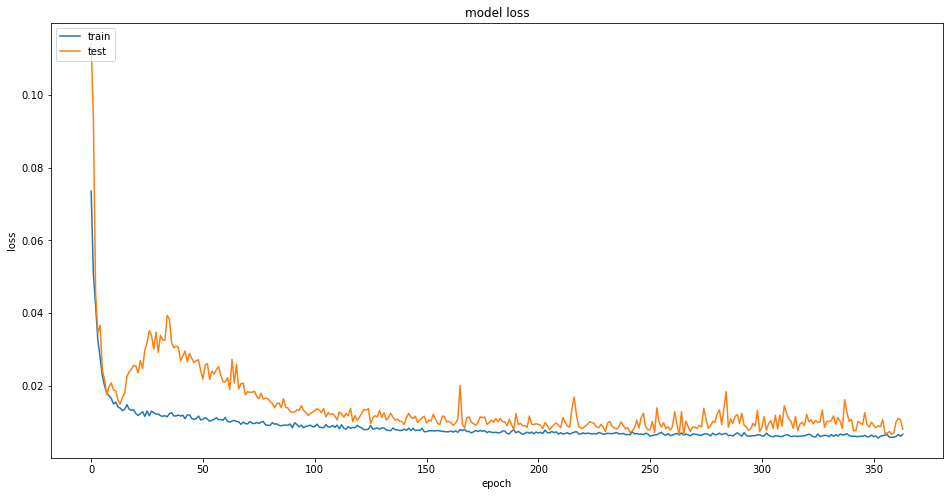

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8)) 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Point_Tl24h_TrainingandValidation Loss.png')
plt.show()

#print(get_flops(model))

In [11]:
trainPredict = model.predict(trX, batch_size=batch_size)
validPredict = model.predict(vaX, batch_size=batch_size)
testPredict = model.predict(teX, batch_size=batch_size)

In [12]:
tePredict = testPredict.reshape([-1])
testY = teY.reshape([-1])

np.savetxt('Point_FullModel24h_testPredict.txt', tePredict)
 
print('Error Test Score > RMSE == ', np.sqrt(np.mean(np.square(testY-tePredict))), ' MAE == ', mean_absolute_error(testY, tePredict), 'MAPE == ', mean_absolute_percentage_error(testY, tePredict))

Error Test Score > RMSE ==  0.007709614982715136  MAE ==  0.005882289137678563 MAPE ==  2.426610447976898


In [13]:
layer_outputs = [layer.output for layer in model.layers if layer.name=='attention_vec']
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
attention_vectors = []
output_data = activation_model.predict(teX)
output_data = np.array(output_data)
print(output_data.shape)
at_vec = np.mean(output_data, axis=0)
print(at_vec, at_vec.shape)
np.savetxt('Attention_Fullmodel+ATT.txt', at_vec)
at_vec = abs(at_vec)

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(23642, 22, 15)
[[ 3.99225056e-02  3.87497582e-02  2.70888675e-02 -5.55550866e-03
  -5.49552822e-03 -1.42984977e-03 -2.09767348e-03 -1.12728029e-02
   1.56287123e-02  6.60490571e-03  3.92647237e-02  3.43713649e-02
  -1.39046973e-02 -8.26011505e-03  3.68689634e-02]
 [ 7.29174539e-03  2.18113977e-03  2.80270092e-02  4.71683927e-02
   4.84137908e-02  4.26274277e-02  4.55432311e-02  5.15291505e-02
   3.48686390e-02  4.16278280e-02  2.49134260e-03  1.83402337e-02
   4.66433764e-02  4.79576476e-02 -1.43861712e-03]
 [ 2.51137675e-03  2.88097677e-03 -6.03359379e-03 -3.63690592e-02
  -3.08647417e-02 -3.58794555e-02 -3.60109583e-02 -2.49768961e-02
  -3.81283015e-02 -4.13542837e-02  2.88762618e-03 -5.89570077e-03
  -2.16925293e-02 -2.03025267e-02  4.04705352e-04]
 [ 2.89022401e-02  2.57254094e-02  3.13809626e-02  1.28395073e-02
   1.91759728e-02  7.70365680e-03  1.20067243e-02  2.79118400e-02
  -4.89207683e-04  4.05761693e-03  2.59833112e-02  2.25029141e-02
   2.82060616e-02  3.03937066e-02  1.64

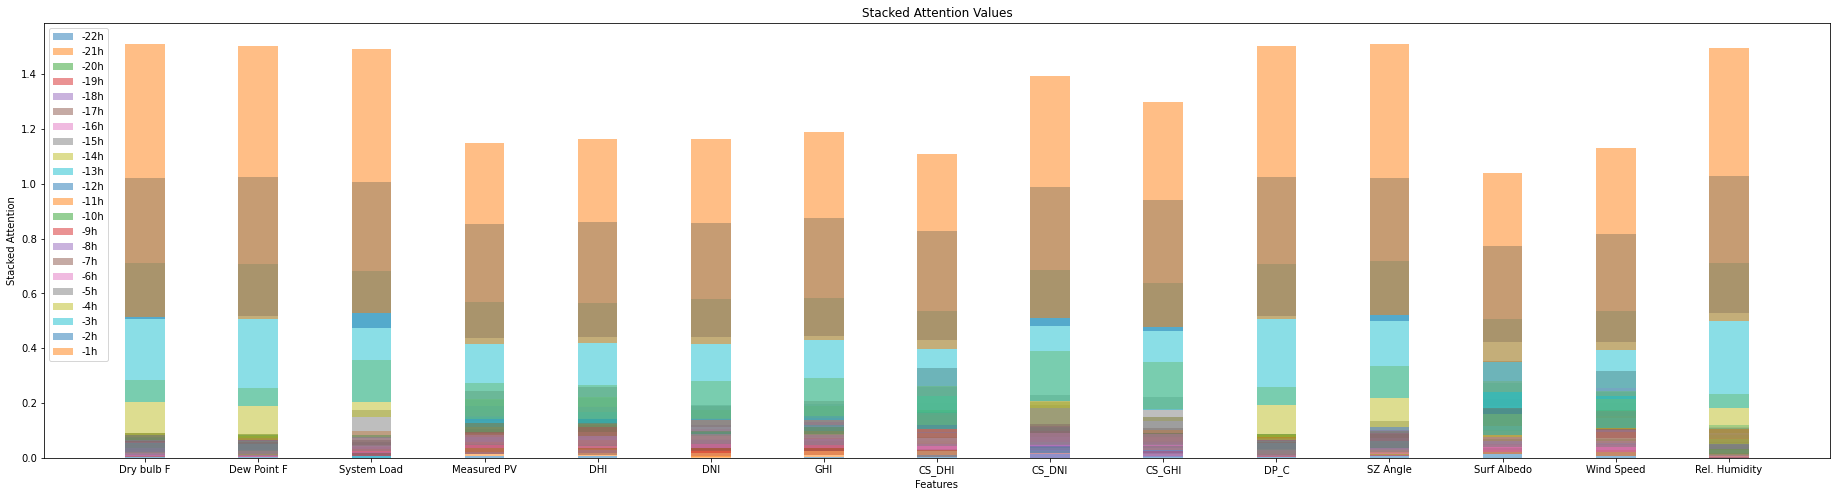

In [14]:
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']

plt.figure(figsize=(32,8)) 
p1 = plt.bar(index, at_vec[0,:], width = 0.35, alpha=0.5)
p2 = plt.bar(index, at_vec[1,:], bottom=at_vec[0,:], width = 0.35, alpha=0.5)
p3 = plt.bar(index, at_vec[2,:], bottom=at_vec[1,:], width = 0.35, alpha=0.5)
p4 = plt.bar(index, at_vec[3,:], bottom=at_vec[2,:], width = 0.35, alpha=0.5)
p5 = plt.bar(index, at_vec[4,:], bottom=at_vec[3,:], width = 0.35, alpha=0.5)
p6 = plt.bar(index, at_vec[5,:], bottom=at_vec[4,:], width = 0.35, alpha=0.5)
p7 = plt.bar(index, at_vec[6,:], bottom=at_vec[5,:], width = 0.35, alpha=0.5)
p8 = plt.bar(index, at_vec[7,:], bottom=at_vec[6,:], width = 0.35, alpha=0.5)
p9 = plt.bar(index, at_vec[8,:], bottom=at_vec[7,:], width = 0.35, alpha=0.5)
p10 = plt.bar(index, at_vec[9,:], bottom=at_vec[8,:], width = 0.35, alpha=0.5)
p11 = plt.bar(index, at_vec[10,:], bottom=at_vec[9,:], width = 0.35, alpha=0.5)
p12 = plt.bar(index, at_vec[11,:], bottom=at_vec[10,:], width = 0.35, alpha=0.5)
p13 = plt.bar(index, at_vec[12,:], bottom=at_vec[11,:], width = 0.35, alpha=0.5)
p14 = plt.bar(index, at_vec[13,:], bottom=at_vec[12,:], width = 0.35, alpha=0.5)
p15 = plt.bar(index, at_vec[14,:], bottom=at_vec[13,:], width = 0.35, alpha=0.5)
p16 = plt.bar(index, at_vec[15,:], bottom=at_vec[14,:], width = 0.35, alpha=0.5)
p17 = plt.bar(index, at_vec[16,:], bottom=at_vec[15,:], width = 0.35, alpha=0.5)
p18 = plt.bar(index, at_vec[17,:], bottom=at_vec[16,:], width = 0.35, alpha=0.5)
p19 = plt.bar(index, at_vec[18,:], bottom=at_vec[17,:], width = 0.35, alpha=0.5)
p20 = plt.bar(index, at_vec[19,:], bottom=at_vec[18,:], width = 0.35, alpha=0.5)
p21 = plt.bar(index, at_vec[20,:], bottom=at_vec[19,:], width = 0.35, alpha=0.5)
p22 = plt.bar(index, at_vec[21,:], bottom=at_vec[20,:], width = 0.35, alpha=0.5)

plt.title('Stacked Attention Values')
plt.ylabel('Stacked Attention')
plt.xlabel('Features')
plt.legend(['-22h', '-21h', '-20h', '-19h', '-18h', '-17h', '-16h', '-15h', '-14h', '-13h', '-12h', '-11h', '-10h', '-9h', '-8h', '-7h', '-6h', '-5h', '-4h', '-3h', '-2h', '-1h'], loc='upper left')
plt.savefig('FullModel+ATT_StackedAttention.png')
plt.show()

In [15]:
import shap
shap.initjs()
background = trX[np.random.choice(trX.shape[0], 300, replace=False)]
print(background.shape)
explainer = shap.DeepExplainer(model, background)
test_sample = trX[-100:]
shap_values = explainer.shap_values(background)

(300, 22, 15)



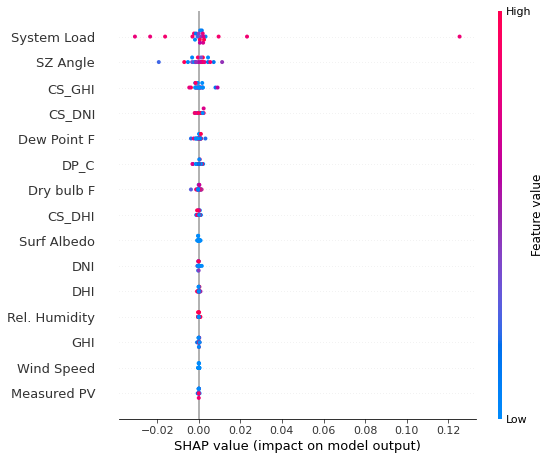

In [16]:
shap.summary_plot(shap_values[0][0], background[0], feature_names=index)
#shap.force_plot(explainer.expected_value[0], shap_values[0], feature_names=index)

In [17]:
shap_np = np.array(shap_values[0])
shap_np = shap_np.reshape(-1,num_features)
print("=========================================================================")
print(shap_np)
np.savetxt('SHAP_VALUES_Fullmodel+ATT.txt', shap_np)

[[ 1.34157542e-03 -6.67234483e-04  2.52497221e-03 ... -2.41049882e-04
   1.35360329e-04 -3.72960305e-04]
 [-9.22227675e-04  1.03957870e-03  4.82301921e-04 ... -3.42477860e-04
   1.02291196e-04 -1.42460086e-04]
 [ 5.71721170e-04  2.32043492e-04  2.24197169e-03 ... -3.49359177e-04
  -4.97143110e-05 -1.96565803e-04]
 ...
 [-1.47442460e-04 -1.67308814e-04  3.38328931e-02 ... -5.25746648e-04
  -1.06026639e-04  1.15987839e-05]
 [-4.09493504e-04  5.52395142e-04  3.73781903e-02 ...  5.96151913e-05
   5.54670969e-05 -4.27489124e-04]
 [-7.40902910e-04 -1.45964170e-03 -8.60588144e-02 ...  6.64608252e-04
  -2.03099570e-04  2.47093278e-04]]


In [18]:
e_tr = trainPredict - trY
e_va = validPredict - vaY
errors = np.vstack([e_tr,e_va])
prediction = np.vstack([trainPredict,validPredict])
print(errors.shape)
print(prediction.shape)

(55174, 1)
(55174, 1)


In [19]:
dataall = np.hstack([load, pv, weather_dat])
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']
dataall = np.vstack([index, dataall])
print(dataall.shape)
print(max(dataall[1:,2]))
df = pd.DataFrame(dataall[1:,:], columns=dataall[0,:])
df.head()
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df2 = norm_df.iloc[:55170, :].copy()
norm_df2.head()

(78841, 15)
9999.0


,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,0.994825,0.05,1.0
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,0.994825,0.05,1.0
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,0.994825,0.05,1.0
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,0.994825,0.05,1.0
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,0.994825,0.05,1.0


In [20]:
Prindex = ['Prediction1']
Erindex = ['Error1']

pr_df = pd.DataFrame(prediction, columns=Prindex)
pr_df.head()

,Prediction1
0,0.261743
1,0.213127
2,0.165290
3,0.132772
4,0.115470


In [21]:
er_df = pd.DataFrame(errors, columns=Erindex)
er_df.head()

,Error1
0,-0.002905
1,0.003034
2,0.000920
3,-0.001521
4,-0.002773


In [22]:
norm_df2 = pd.concat([norm_df2, pr_df, er_df],axis=1)
norm_df2.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity,Prediction1,Error1
0,0.423423,0.54,0.218118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.998572,0.994825,0.05,1.0,0.261743,-0.002905
1,0.423423,0.54,0.185768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.955240,0.994825,0.05,1.0,0.213127,0.003034
2,0.414414,0.54,0.162604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.887636,0.994825,0.05,1.0,0.165290,0.000920
3,0.414414,0.55,0.149937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.811215,0.994825,0.05,1.0,0.132772,-0.001521
4,0.423423,0.56,0.148120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53211,0.732332,0.994825,0.05,1.0,0.115470,-0.002773


Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Saving heatmap
               Dry bulb F  Dew Point F  System Load  Measured PV       DHI  \
Dry bulb F       1.000000     0.912920     0.211611     0.165982  0.298630   
Dew Point F      0.912920     1.000000     0.090444     0.034873  0.206909   
System Load      0.211611     0.090444     1.000000     0.132329  0.347485   
Measured PV      0.165982     0.034873     0.132329     1.000000  0.438746   
DHI              0.298630     0.206909     0.347485     0.438746  1.000000   
DNI              0.158469    -0.035295     0.260305     0.595420  0.400258   
GHI              0.306079     0.125565     0.338965     0.652287  0.722642   
CS_DHI           0.282151     0.201631     0.391502     0.436539  0.855188   
CS_DNI           0.191605     0.047139     0.346907     0.585363  0.772716   
CS_GHI           0.302310     0.168093     0.361453     0.593860  0.866446   
DP_C             0.936290     0.977776     0.112297     0.029963  0.221980   
SZ Angle        -0.373992    -0.241487    -0.4254

<Figure size 432x288 with 0 Axes>

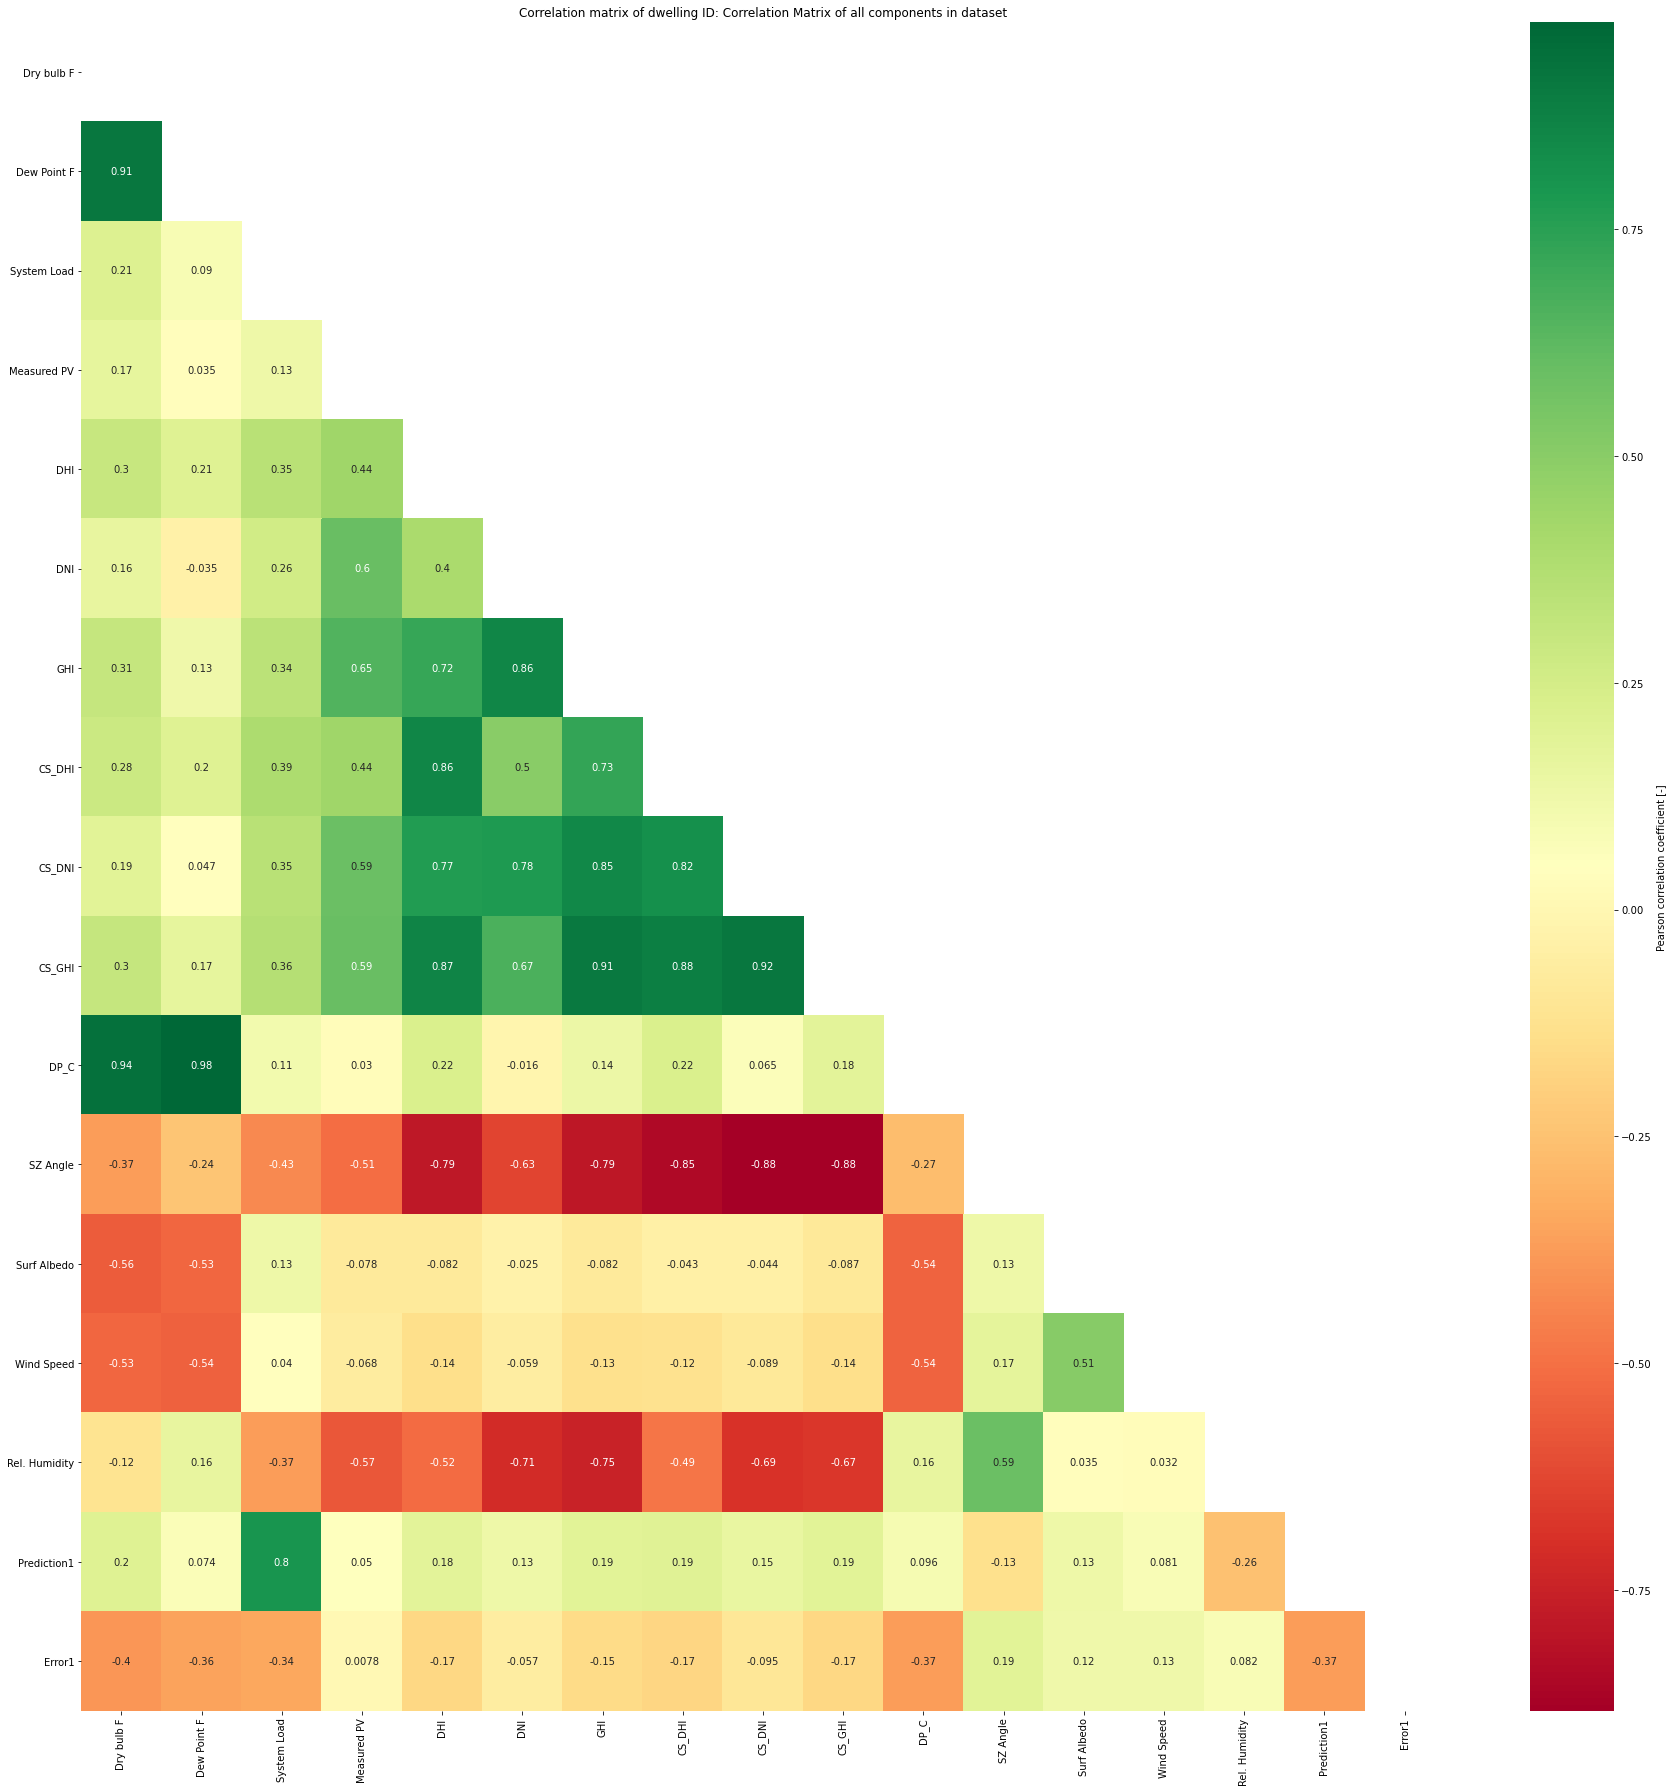

In [23]:
import seaborn as sns
from keijzer import *

fig = create_corr_matrix(norm_df2, 'Correlation Matrix of all components in dataset', True, size=(25,25))
fig.savefig('correlation_matrix.png')

corrMatrix = norm_df2.corr()
print(corrMatrix)

In [24]:
norm_df2 = np.array(norm_df2)
print(norm_df2.shape)
timesteps = 22
output_timesteps = 1
Xe, Ye = create_dataset(norm_df2, timesteps, output_timesteps)
print(Xe.shape)
print(Ye.shape)

(55174, 17)
(55150, 22, 17)
(55150, 1, 17)


In [25]:
trXe = Xe[:50000, :, :]
vaXe = Xe[50000:, :, :]
trYe = Ye[:50000, :, -1:]
vaYe = Ye[50000:, :, -1:]
trYe = trYe.reshape(-1,1)
vaYe = vaYe.reshape(-1,1)
print(trXe.shape)
print(trYe.shape)
print(vaXe.shape)

(50000, 22, 17)
(50000, 1)
(5150, 22, 17)


In [26]:
with tf.device('/gpu:0'):
    alpha=1.0
    gamma=1.2
    beta = 1.178511
    num_features = 17
    hfilters = 128
    hkernel_size1 = 2
    hkernel_size2 = 4
    visible1e = Input(shape=(timesteps, num_features))
    per1 = Permute((2,1))(visible1e)
    den1a = Dense(timesteps, activation='tanh')(per1)
    den1b = Dense(timesteps, activation='sigmoid')(per1)
    den1 = Multiply()([den1a, den1b])
    per2 = Permute((2,1), name='attention_vece')(den1)
    mul1 = Multiply()([visible1e, per2])
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res01 = Add()([d1, visible1e])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res02 = Add()([d1, res01])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res03 = Add()([d1, res02])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res04 =Add()([d1, res03])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res04)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=32)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res05 = Add()([d1, res04])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=32)(res05) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res06 = Add()([d1, res05])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res06) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res07 = Add()([d1, res06])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res07)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res08 = Add()([d1, res07])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res08)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res09 = Add()([d1, res08])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res09) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res10 = Add()([d1, res09])   # 
    
    print('res10 :', res10.shape)  # (None, 24, 11) 
    
    oute = Conv1D(512, 1, padding='same', activation='relu')(res10)   # 256, 11X10=110  
    oute = Dropout(0.2)(oute)   
    
    oute = Conv1D(256, 1, padding='same', activation='relu')(oute) # 512,  110X5=550
    oute = Dropout(0.2)(oute)  
    
    oute = GlobalAveragePooling1D()(oute) # pool_size=2, strides=1
    
    oute = Dense(1)(oute) 
    modele = Model(inputs=[visible1e], outputs=[oute])
    
    print(modele.summary())
    
    modele.compile(loss=root_mean_squared_error, optimizer='adam', metrics=[root_mean_squared_error, 'mse', 'mae', 'mape'])
    early_stopping =EarlyStopping(monitor='val_loss', patience=100)
    batch_size = 100
    epochs = 1000

    history = LossHistory()
    history.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

res10 : (?, 22, 17)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 22, 17)]     0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 17, 22)       0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 17, 22)       506         permute_1[0][0]                  
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 17, 22)       506         permute_1[0][0]                  
________________________________________________________________________

In [27]:
    %%time
    histe = modele.fit(trXe, trYe, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaXe, vaYe), callbacks=[history, early_stopping])  # , checkpoint

Train on 50000 samples, validate on 5150 samples
Epoch 1/1000
50000/50000 [==============================] - ETA: 0s - loss: 0.0089 - root_mean_squared_error: 0.0089 - mean_squared_error: 4.8214e-04 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 753.9675

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


50000/50000 [==============================] - 14s 286us/sample - loss: 0.0089 - root_mean_squared_error: 0.0089 - mean_squared_error: 4.8214e-04 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 753.9675 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0104 - val_mean_squared_error: 1.0825e-04 - val_mean_absolute_error: 0.0085 - val_mean_absolute_percentage_error: 939.5092
Epoch 2/1000
50000/50000 [==============================] - 13s 266us/sample - loss: 0.0060 - root_mean_squared_error: 0.0060 - mean_squared_error: 4.5844e-05 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 390.0304 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0107 - val_mean_squared_error: 1.1423e-04 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 1001.7319
Epoch 3/1000
50000/50000 [==============================] - 13s 268us/sample - loss: 0.0059 - root_mean_squared_error: 0.0059 - mean_squared_error: 4.2182e-05 - mean_absolute_error: 0.0046 - mean_ab

In [28]:
layer_outputs = [layer.output for layer in modele.layers if layer.name=='attention_vece']
activation_model = tf.keras.models.Model(inputs=modele.input, outputs=layer_outputs)
attention_vectors = []
output_data = activation_model.predict(trXe, batch_size=batch_size)
output_data = np.array(output_data)
print(output_data.shape)
at_vec = np.mean(output_data, axis=0)
print(at_vec, at_vec.shape)
np.savetxt('Attention_FSEFF_EL.txt', at_vec)
at_vec = abs(at_vec)

(50000, 22, 17)
[[ 1.42712921e-01  1.18151970e-01  2.30770513e-01  1.44953564e-01
   1.65765509e-01  1.24025732e-01  1.37729943e-01  1.90869123e-01
   8.70273262e-02  1.12863377e-01  1.17548078e-01  1.54385075e-01
   1.81668162e-01  1.82830885e-01  8.24493766e-02  2.32656509e-01
   8.75923410e-02]
 [ 3.93781811e-02  2.94724293e-02  1.02313370e-01  4.14989665e-02
   6.03222214e-02  2.44714804e-02  3.44828889e-02  8.63225684e-02
  -2.48059421e-03  1.19527001e-02  2.72585135e-02  5.40786870e-02
   8.74919072e-02  7.29525909e-02  1.54555356e-02  1.04036078e-01
  -1.80716664e-02]
 [ 6.07423969e-02  4.57425825e-02  1.58876956e-01 -4.94403616e-02
   2.33686432e-01  1.55168995e-01  2.14528099e-01  2.41733834e-01
   1.92215055e-01  2.23366529e-01  4.26422954e-02  8.01265016e-02
   9.33897197e-02  2.56328043e-02  1.98811032e-02  1.62393510e-01
  -2.64910966e-01]
 [ 5.86849898e-02  4.50471006e-02  1.24821670e-01 -4.34441306e-03
   1.35650888e-01  1.17145002e-01  1.39987513e-01  1.25723436e-01
   

In [29]:
import shap
shap.initjs()
background = trXe[np.random.choice(trXe.shape[0], 300, replace=False)]
print(background.shape)
explainer = shap.DeepExplainer(modele, background)
test_sample = trXe[-100:]
shap_values = explainer.shap_values(background)

(300, 22, 17)


In [30]:
index2 = np.concatenate([index, Prindex, Erindex])

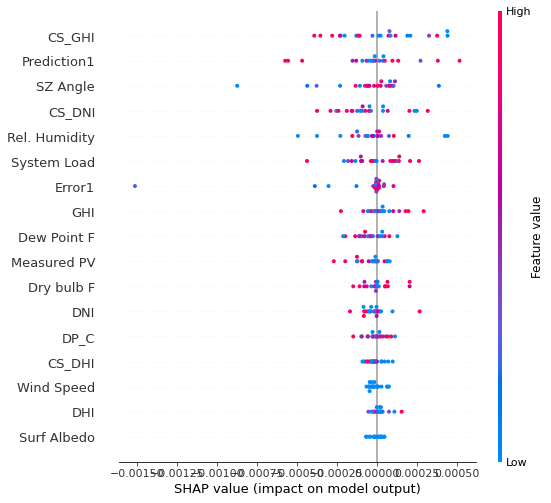

In [31]:
shap.summary_plot(shap_values[0][0], background[0], feature_names=index2)
#shap.force_plot(explainer.expected_value[0], shap_values[0], feature_names=index)

In [32]:
shap_np = np.array(shap_values[0])
shap_np = shap_np.reshape(-1,num_features)
print("=========================================================================")
print(shap_np)
np.savetxt('SHAP_VALUES_FSEFF_EL.txt', shap_np)

[[ 6.28414054e-06 -2.32508426e-05 -2.04377762e-04 ... -5.69554519e-05
   3.89470710e-05  1.39583944e-05]
 [ 2.23261611e-06 -4.30602729e-05 -1.33059255e-04 ... -1.52096057e-04
  -2.00185549e-05 -1.06390411e-05]
 [ 1.80027812e-06 -1.05319172e-04  1.23538041e-04 ...  1.07368728e-04
  -8.90060150e-05  1.05477683e-04]
 ...
 [-1.17870977e-04  1.44492309e-04 -7.20398522e-05 ...  5.04750950e-05
   2.62260486e-04  3.80681680e-04]
 [ 4.05655902e-07  1.19746259e-04 -6.61562270e-05 ... -2.09841186e-05
   6.07862455e-05  2.61914578e-05]
 [-7.36735735e-05  2.22637672e-04 -2.06377579e-04 ...  4.25871605e-05
  -1.48058112e-04 -7.46767094e-04]]


In [33]:
a = hist.history['loss']
b = hist.history['val_loss']
ae = histe.history['loss']
be = histe.history['val_loss']

In [34]:
np.savetxt('Loss_Basic.txt', a)
np.savetxt('ValLoss_Basic.txt', b)
np.savetxt('Loss_EL.txt', ae)
np.savetxt('ValLoss_EL.txt', be)